In [147]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [148]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly
from sklearn.preprocessing import LabelEncoder

In [149]:
path_delivery="/content/drive/MyDrive/deliveries.csv"
delivery_df=pd.read_csv(path_delivery)
path_matches="/content/drive/MyDrive/matches.csv"
matches_df=pd.read_csv(path_matches)
path_dataset="/content/drive/MyDrive/ipl.csv"
dataset_df=pd.read_csv(path_dataset)

In [150]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [151]:
matches_df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [152]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [153]:
matches_df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

Data Preprocessing


In [154]:
#list of venues or stadium
matches_df['venue'].value_counts()

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

In [155]:
#list of cities
matches_df['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Rajkot             10
Mohali             10
Dharamsala          9
Indore              9
Johannesburg        8
Abu Dhabi           7
Cuttack             7
Port Elizabeth      7
Cape Town           7
Ranchi              7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Kimberley           3
Nagpur              3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [156]:
matches_df[matches_df['city'].isnull()==True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [157]:
index=np.where(matches_df.city.isnull())
for i in index: matches_df.loc[i,'city']="Dubai"

In [158]:
matches_df.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [159]:
matches_df[matches_df['player_of_match'].isnull()==True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [160]:
matches_df.drop('umpire3',axis=1,inplace=True)

In [161]:
matches_df.dropna(axis=0,inplace=True)

In [162]:
matches_df=matches_df.replace(to_replace="Rising Pune Supergiants",value="Rising Pune Supergiant")

In [163]:
seasons=matches_df['season'].unique()
seasons=np.sort(seasons)

In [164]:
#EDA: Question 1
teams_=['']*len(seasons)
wins_=[0]*len(seasons)
for i in range(0,len(seasons)):
  m=matches_df[matches_df['season']==seasons[i]]
  teams_[i]=m.winner.value_counts().idxmax()
  wins_[i]=m.winner.value_counts().max()
teams_=np.array(teams_)
wins_=np.array(wins_)

#This part of the code might be redundant
df0=pd.DataFrame(seasons,columns=['Season'])
df1=pd.DataFrame(teams_,columns=['Teams'])
df2=pd.DataFrame(wins_,columns=['Wins'])

df_wins=pd.concat([pd.concat([df0,df1],axis=1),df2],axis=1)
#df
fig =  px.bar(df_wins,x='Season',y='Wins',color='Teams')
fig.update_layout(title='Maximum number of wins by any team in a season',title_x=0.5)
fig.show()
#df_wins

In [165]:
#EDA: Question 2
venue = matches_df.city.value_counts().index
nof_matches = matches_df.city.value_counts().values
d1 = pd.DataFrame(venue,columns=["Venues"])
d2 = pd.DataFrame(nof_matches,columns = ["No of matches"])
data=pd.concat([d1,d2],axis=1)
fig=px.bar(data,x='Venues',y='No of matches',color='Venues')
fig.update_layout(title='Venues with most number of matches',title_x=0.5)
fig.show()

In [166]:
#EDA: Question 3
team_win=matches_df.winner.value_counts().index
team_now=matches_df.winner.value_counts().values
matches_played=[0]*len(team_win)
win_percentage=[0]*len(team_win)
i=0
for w in team_win:
  matches_played[i]=(matches_df['team1'].tolist()).count(w)+(matches_df['team2'].tolist()).count(w)
  win_percentage[i]=round((team_now[i]/matches_played[i])*100,2)
  i+=1

df0_win=pd.DataFrame(team_win,columns=['Team'])
df1_win=pd.DataFrame(matches_played,columns=['Number of matches played'])
df2_win=pd.DataFrame(team_now,columns=['Number of matches Won'])
df3_win=pd.DataFrame(win_percentage,columns=['Win%'])

df_win=pd.concat([df0_win,df1_win,df2_win,df3_win],axis=1)
df_win.sort_values(['Win%'],ascending=False,ignore_index=True)
#df_win=df_win.style.set_properties(**{'text-align':'center'})

fig =px.bar(df_win,x='Team',y='Number of matches Won',color='Team')
fig.update_layout(title='Most number of wins',title_x=0.5)
fig.show()

In [167]:
fig =px.bar(df_win,x='Team',y='Win%',color='Team')
fig.update_layout(title='Most number of wins percentage-wise',title_x=0.5)
fig.show()

In [168]:
df_win

,Team,Number of matches played,Number of matches Won,Win%
0,Mumbai Indians,187,109,58.29
1,Chennai Super Kings,164,100,60.98
2,Kolkata Knight Riders,178,92,51.69
3,Royal Challengers Bangalore,176,83,47.16
4,Kings XI Punjab,176,82,46.59
5,Rajasthan Royals,145,75,51.72
6,Delhi Daredevils,158,67,42.41
7,Sunrisers Hyderabad,107,58,54.21
8,Deccan Chargers,75,29,38.67
9,Rising Pune Supergiant,30,15,50.00


In [169]:
#EDA:Question 4
player = matches_df['player_of_match'].value_counts().index
nof_times = matches_df['player_of_match'].value_counts().values

d1=pd.DataFrame(player,columns=['Player'])
d2=pd.DataFrame(nof_times,columns=['Number_of_times'])

data=pd.concat([d1[0:10],d2[0:10]],axis=1)
fig=px.bar(data,x='Player',y='Number_of_times',color='Player')
fig.update_layout(title = 'Most number of Man of Matches',title_x=0.5)


In [170]:
#EDA: question 5
team_toss=matches_df.toss_winner.value_counts().index
team_nowt=matches_df.toss_winner.value_counts().values

matches_played=[0]*len(team_toss)
win_percentage=[0]*len(team_toss)
i=0
for w in team_toss:
  matches_played[i]=(matches_df['team1'].tolist()).count(w)+(matches_df['team2'].tolist()).count(w)
  win_percentage[i]=round((team_nowt[i]/matches_played[i])*100,2)
  i+=1

df0_toss=pd.DataFrame(team_toss,columns=['Team'])
df1_toss=pd.DataFrame(matches_played,columns=['Number of matches played'])
df2_toss=pd.DataFrame(team_nowt,columns=['Number of toss Won'])
df3_toss=pd.DataFrame(win_percentage,columns=['Win%'])

df_toss=pd.concat([df0_toss,df1_toss,df2_toss,df3_toss],axis=1)
df_toss.sort_values(['Win%'],ascending=False,ignore_index=True)

fig=px.bar(df_toss,x='Team',y='Number of toss Won',color='Team')
fig.update_layout(title='Toss wins',title_x=0.5)
fig.show()

fig=px.bar(df_toss,x='Team',y='Win%',color='Team')
fig.update_layout(title='Toss wins percentage-wise',title_x=0.5)
fig.show()


In [171]:
#EDA: Question 6

In [172]:
#Make both win by runs and win by wickets as subplots
matches_winbyruns=matches_df[matches_df['win_by_runs']!=0].sort_values(by=['win_by_runs'],ascending=False,ignore_index=True)
matches_winbyruns.drop(matches_winbyruns.index[10:],inplace=True)
to_drop=['id','toss_winner','toss_decision','dl_applied','win_by_wickets','player_of_match','venue','umpire1','umpire2']
matches_winbyruns.drop(to_drop,axis=1,inplace=True)
x=[''] * len(matches_winbyruns)
for i in range(len(matches_winbyruns)):
  if(matches_winbyruns['winner'][i] == matches_winbyruns['team1'][i]):
    x[i] = str(matches_winbyruns['team1'][i])+' vs '+str(matches_winbyruns['team2'][i])
  else:
    x[i] = str(matches_winbyruns['team2'][i])+' vs '+str(matches_winbyruns['team1'][i])
vs=pd.DataFrame(x,columns=['vs'])
output1=pd.concat([matches_winbyruns,vs],axis=1)
#matches_winbyruns
output1

,season,city,date,team1,team2,result,winner,win_by_runs,vs
0,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,normal,Mumbai Indians,146,Mumbai Indians vs Delhi Daredevils
1,2016,Bangalore,2016-05-14,Royal Challengers Bangalore,Gujarat Lions,normal,Royal Challengers Bangalore,144,Royal Challengers Bangalore vs Gujarat Lions
2,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,normal,Kolkata Knight Riders,140,Kolkata Knight Riders vs Royal Challengers Ban...
3,2015,Bangalore,2015-05-06,Royal Challengers Bangalore,Kings XI Punjab,normal,Royal Challengers Bangalore,138,Royal Challengers Bangalore vs Kings XI Punjab
4,2013,Bangalore,2013-04-23,Royal Challengers Bangalore,Pune Warriors,normal,Royal Challengers Bangalore,130,Royal Challengers Bangalore vs Pune Warriors
5,2019,Hyderabad,31/03/19,Sunrisers Hyderabad,Royal Challengers Bangalore,normal,Sunrisers Hyderabad,118,Sunrisers Hyderabad vs Royal Challengers Banga...
6,2011,Dharamsala,2011-05-17,Kings XI Punjab,Royal Challengers Bangalore,normal,Kings XI Punjab,111,Kings XI Punjab vs Royal Challengers Bangalore
7,2008,Mumbai,2008-05-30,Rajasthan Royals,Delhi Daredevils,normal,Rajasthan Royals,105,Rajasthan Royals vs Delhi Daredevils
8,2018,Kolkata,09/05/18,Mumbai Indians,Kolkata Knight Riders,normal,Mumbai Indians,102,Mumbai Indians vs Kolkata Knight Riders
9,2010,Delhi,2010-03-17,Mumbai Indians,Delhi Daredevils,normal,Mumbai Indians,98,Mumbai Indians vs Delhi Daredevils


In [173]:
matches_winbywickets=matches_df[matches_df['win_by_wickets']!=0].sort_values(by=['win_by_wickets'],ascending=False,ignore_index=True)
matches_winbywickets.drop(matches_winbywickets.index[10:],inplace=True)
to_drop=['id','toss_winner','toss_decision','dl_applied','win_by_runs','player_of_match','venue','umpire1','umpire2']
matches_winbywickets.drop(to_drop,axis=1,inplace=True)
#matches_winbywickets
y=[''] * len(matches_winbywickets)
for i in range(len(matches_winbywickets)):
  if(matches_winbywickets['winner'][i] == matches_winbywickets['team1'][i]):
    y[i] = str(matches_winbywickets['team1'][i])+' vs '+str(matches_winbywickets['team2'][i])
  else:
    y[i] = str(matches_winbywickets['team2'][i])+' vs '+str(matches_winbywickets['team1'][i])
vs=pd.DataFrame(y,columns=['vs'])
#matches_winbyruns
output2=pd.concat([matches_winbywickets,vs],axis=1)

In [174]:
fig = px.bar(output1,x='win_by_runs',y='vs',color='season')
fig.update_layout(title ='Max Margin wins - Runs',title_x=0.5)
fig.show()

fig = px.bar(output2,x='win_by_wickets',y='vs',color='season')
fig.update_layout(title ='Max Margin wins - Wickets',title_x=0.5)
fig.show()


In [175]:
delivery_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [176]:
#EDA: question 7

In [177]:
century=delivery_df.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
century=century[century['batsman_runs']>=100]
century=century.groupby('batsman').agg({'count'})
century.columns=century.columns.droplevel() #Re-check about the levels
century.sort_values(by=['count'],inplace=True,ascending=False)
century.reset_index(drop=False,inplace=True)

century = century[0:10]
#century

fig=px.bar(century,x='batsman',y='count',color='batsman')
fig.update_layout(title="Most number of 100's",title_x=0.5)
fig.show()

In [178]:
half_century=delivery_df.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
half_century=half_century[half_century['batsman_runs']>=50]
half_century=half_century[half_century['batsman_runs']<100]
half_century=half_century.groupby('batsman').agg({'count'})
half_century.columns=half_century.columns.droplevel() #Re-check about the levels
half_century.sort_values(by=['count'],inplace=True,ascending=False)
half_century.reset_index(drop=False,inplace=True)

half_century = half_century[0:10]

fig=px.bar(half_century,x='batsman',y='count',color='batsman')
fig.update_layout(title="Most number of 50's",title_x=0.5)
fig.show()


In [179]:
fours=delivery_df[delivery_df['batsman_runs']==4]
fours=fours[['match_id','batsman','batsman_runs']]
fours=fours.groupby(['batsman']).agg({'batsman_runs':'count'})
fours=fours.rename(columns={'batsman_runs':'Fours'})
fours.sort_values(by=['Fours'],inplace=True,ascending=False)
fours.reset_index(drop=False,inplace=True)

In [180]:
sixes=delivery_df[delivery_df['batsman_runs']==6]
sixes=sixes[['match_id','batsman','batsman_runs']]
sixes=sixes.groupby(['batsman']).agg({'batsman_runs':'count'})
sixes=sixes.rename(columns={'batsman_runs':'Sixes'})
sixes.sort_values(by=['Sixes'],inplace=True,ascending=False)
sixes.reset_index(drop=False,inplace=True)

In [181]:
total_runs=delivery_df.groupby(['batsman']).agg({'batsman_runs':'sum'})
total_runs.groupby(['batsman']).agg({'batsman_runs':'sum'})
total_runs.sort_values(by=['batsman_runs'],inplace=True,ascending=False)
total_runs.reset_index(drop=False,inplace=True)

In [182]:
wickets=delivery_df.dropna()
wickets_bowler=wickets['bowler'].value_counts().index
wickets_now=wickets['bowler'].value_counts().values
temp=pd.DataFrame(wickets_bowler,columns=['Bowler'])
temp2=pd.DataFrame(wickets_now,columns=['Number of wickets'])
wickets=pd.concat([temp,temp2],axis=1)

In [183]:
delivery_df[delivery_df['batsman']=='MS Dhoni'].drop_duplicates(subset=['match_id'])['match_id'].size

170

In [184]:
def player_stats(player_name):
  #Number of matches played
  matches_played=delivery_df[delivery_df['batsman']== player_name].drop_duplicates(subset=['match_id'])['match_id'].size
  if(total_runs[total_runs['batsman']==player_name]['batsman_runs'].size == 0):
    runs_scored=0
  else:
    runs_scored=total_runs[total_runs['batsman']==player_name]['batsman_runs'].values[0]
  
  if(fours[fours['batsman']==player_name]['Fours'].size == 0):
    nof_fours=0
  else:
    nof_fours=fours[fours['batsman']==player_name]['Fours'].values[0]
  
  if(sixes[sixes['batsman']==player_name]['Sixes'].size == 0):
    nof_sixes=0
  else:
    nof_sixes=sixes[sixes['batsman']==player_name]['Sixes'].values[0]
  
  if(half_century[half_century['batsman']==player_name]['count'].size == 0):
    half_centuries_scored=0
  else:
    half_centuries_scored=half_century[half_century['batsman']==player_name]['count'].values[0]

  if(century[century['batsman']==player_name]['count'].size == 0):
    centuries_scored=0
  else:
    centuries_scored=century[century['batsman']==player_name]['count'].values[0]

  if(wickets[wickets['Bowler']==player_name]['Number of wickets'].size == 0):
    wickets_taken=0
  else:
    wickets_taken=wickets[wickets['Bowler']==player_name]['Number of wickets'].values[0]
  
  player_data=[matches_played, runs_scored, nof_fours, nof_sixes, half_centuries_scored, centuries_scored, wickets_taken]
  player_df=pd.DataFrame(player_data,columns=[player_name])
  
  return player_df


In [185]:
#EDA: question 8
#comparision of two Players
player1='CH Gayle'
player2='DA Warner'
metrics=pd.DataFrame(['Matches Played','Runs scored','4s','6s','50s','100s','Wickets'],columns=['Comparision'])
Comparision=pd.concat([player_stats(player1),metrics],axis=1)
Comparision=pd.concat([Comparision,player_stats(player2)],axis=1)
Comparision=Comparision.style.set_properties(**{'text-align':'center'})
Comparision

,CH Gayle,Comparision,DA Warner
0,124,Matches Played,126
1,4560,Runs scored,4741
2,376,4s,459
3,327,6s,181
4,28,50s,44
5,7,100s,4
6,12,Wickets,0


In [186]:
#EDA: Question 10
#comparison between two teams
team1='Sunrisers Hyderabad'
team2='Royal Challengers Bangalore'


matches_comp=matches_df[(matches_df['team1']== team1) |(matches_df['team2']==team1) ] 
matches_comp=matches_comp[(matches_comp['team1'] == team2 )|(matches_comp['team2']==team2)]
matches_comp.sort_values(by=['season'],inplace=True)
matches_comp=matches_comp[['season','team1','team2','winner']]
matches_comp.groupby(['season','winner'])['winner'].count()


season  winner                     
2013    Royal Challengers Bangalore    1
        Sunrisers Hyderabad            1
2014    Royal Challengers Bangalore    1
        Sunrisers Hyderabad            1
2015    Royal Challengers Bangalore    1
        Sunrisers Hyderabad            1
2016    Royal Challengers Bangalore    1
        Sunrisers Hyderabad            2
2017    Sunrisers Hyderabad            1
2018    Royal Challengers Bangalore    1
        Sunrisers Hyderabad            1
2019    Royal Challengers Bangalore    1
        Sunrisers Hyderabad            1
Name: winner, dtype: int64

In [187]:
delivery_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [211]:
#Creating two new features current runs,wickets and total runs
data_df=delivery_df[delivery_df["is_super_over"] == 0]
to_drop=["non_striker","batsman","bowler","wide_runs","bye_runs","is_super_over","legbye_runs","noball_runs","penalty_runs","batsman_runs","extra_runs","dismissal_kind","fielder"]
data_df=data_df.drop(to_drop,axis=1)
data_df=data_df[data_df['inning'] <= 2] 
data_df.loc[data_df['player_dismissed'].notnull(),'player_dismissed']= 1
data_df.loc[data_df['player_dismissed'].isnull(),'player_dismissed'] = 0
id_item=data_df['match_id'].unique()
total=np.empty(0)
current_score=np.empty(0)
current_wickets=np.empty(0)
for j in range(0,756):
  m=data_df[data_df['match_id'] == id_item[j]]
  m1=m[m['inning'] == 1]
  m2=m[m['inning'] == 2]
  len1=len(m1)
  len2=len(m2)
  m1.reset_index(drop=True,inplace=True)
  m2.reset_index(drop=True,inplace=True)
  run1=np.array([m1['total_runs'].sum()]*len1)
  run2=np.array([m2['total_runs'].sum()]*len2)
  cscore1=m1['total_runs'].cumsum()
  cscore2=m2['total_runs'].cumsum()
  cwickets1=m1['player_dismissed'].cumsum()
  cwickets2=m2['player_dismissed'].cumsum()
  total=np.append(total,run1)
  total=np.append(total,run2)
  current_score=np.append(current_score,cscore1)
  current_score=np.append(current_score,cscore2)
  current_wickets=np.append(current_wickets,cwickets1)
  current_wickets=np.append(current_wickets,cwickets2)
data_df.reset_index(drop=True,inplace=True)

In [212]:
data_currentscore = pd.DataFrame(current_score,columns=['Current_score'])

In [213]:
data_wickets = pd.DataFrame(current_wickets,columns=['Current_wickets'])

In [214]:
data_total=pd.DataFrame(total,columns=['Total'])

In [215]:
data_df['over_current']=data_df['over']+data_df['ball']/10

In [216]:
data_df=pd.concat([data_df,data_currentscore,data_wickets,data_total],axis=1)

In [217]:
data_df.drop(['over','ball','total_runs','player_dismissed','batting_team','bowling_team'],axis=1,inplace=True)

In [218]:
data_df

,match_id,inning,over_current,Current_score,Current_wickets,Total
0,1,1,1.1,0.0,0,207.0
1,1,1,1.2,0.0,0,207.0
2,1,1,1.3,4.0,0,207.0
3,1,1,1.4,4.0,0,207.0
4,1,1,1.5,6.0,0,207.0
...,...,...,...,...,...,...
178977,11415,2,20.2,152.0,5,157.0
178978,11415,2,20.3,154.0,5,157.0
178979,11415,2,20.4,155.0,6,157.0
178980,11415,2,20.5,157.0,6,157.0


In [196]:
data_df_ml=dataset_df
data_df_ml.drop(['mid','date','venue','bat_team','bowl_team','batsman','bowler','runs_last_5','wickets_last_5'],axis=1,inplace=True)

Machine Learning

Regression

In [313]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

def custom_accuracy(y_test,y_pred,threshold):
  results=0
  for i in range(len(y_pred)):
    error= y_pred[i] - y_test[i]
    if(abs(y_pred[i] - y_test[i]) <= threshold):
       results+=1
  return results

sc=StandardScaler()
sc.fit_transform(data_df_ml)


X=data_df_ml.iloc[:,0:-1]
Y=data_df_ml.iloc[:,-1]

x_train,x_test,y,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

#Linear Regression
lr=LinearRegression()
lr.fit(x_train,y)
y_pred=lr.predict(x_test)
print(custom_accuracy(y_test.to_numpy(),y_pred,20))
print(custom_accuracy(y_test.to_numpy(),y_pred,20)/len(y_test) *100)


# #RF
rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y)
y_pred=rf.predict(x_test)
print((custom_accuracy(y_test.to_numpy(),y_pred,10)))
print((custom_accuracy(y_test.to_numpy(),y_pred,10)) *100 /len(y_pred))


13974
73.53188802357398
12393
65.21258682382657


Classification

In [198]:
#Classification using RF and SVM
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 

matches_df.loc[matches_df['winner'] == matches_df['team1'],"team1_win"]=1
matches_df.loc[matches_df['winner'] != matches_df['team1'],"team1_win"]=1

matches_df.loc[matches_df["toss_winner"] == matches_df["team1"],"team1_toss_win"]=1
matches_df.loc[matches_df["toss_winner"] != matches_df["team1"],"team1_toss_win"]=0

matches_df["team1_bat"]=0
matches_df.loc[(matches_df["team1_toss_win"] == 1) & (matches_df["toss_decision"] == "bat"),"team1_bat"]=1

le=LabelEncoder()
matches_df['team1']=le.fit_transform(matches_df['team1'])
matches_df['team2']=le.fit_transform(matches_df['team2'])
matches_df['toss_winner']=le.fit_transform(matches_df['toss_winner'])
matches_df['winner']=le.fit_transform(matches_df['winner'])


reg_df=matches_df[["team1","team2","team1_toss_win","team1_bat","team1_win"]]
x=reg_df.drop('team1_win',axis=1)
y=pd.DataFrame(reg_df['team1_win'],columns=['team1_win'])


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

y_train.to_numpy()
y_test.to_numpy()

rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Neural Network

In [264]:
data_df

,match_id,inning,over_current,Current_score,Current_wickets,Total
0,1,1,1.1,0.0,0,207.0
1,1,1,1.2,0.0,0,207.0
2,1,1,1.3,4.0,0,207.0
3,1,1,1.4,4.0,0,207.0
4,1,1,1.5,6.0,0,207.0
...,...,...,...,...,...,...
178977,11415,2,20.2,152.0,5,157.0
178978,11415,2,20.3,154.0,5,157.0
178979,11415,2,20.4,155.0,6,157.0
178980,11415,2,20.5,157.0,6,157.0


In [297]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf


In [305]:
dataset_size=len(data_df)
split=int(np.floor(0.05 * dataset_size))
df_train=data_df.iloc[split:,:]   #Check this
df_test=data_df.iloc[:split,:]

std_scaler=MinMaxScaler()

df_train1=std_scaler.fit_transform(df_train)
data_df_train=pd.DataFrame(df_train1)
df_test1=std_scaler.fit_transform(df_test)
data_df_test=pd.DataFrame(df_test1)
split=int(np.floor(0.05 * len(data_df_train)))
df_train=data_df_train.iloc[split:,:]
data_df_valid=data_df_train.iloc[:split,:]
data_df_train=df_train
data_df_train

,0,1,2,3,4,5
8501,0.003252,0.0,0.525253,0.254753,0.3,0.517241
8502,0.003252,0.0,0.530303,0.269962,0.3,0.517241
8503,0.003252,0.0,0.555556,0.273764,0.3,0.517241
8504,0.003252,0.0,0.560606,0.277567,0.3,0.517241
8505,0.003252,0.0,0.565657,0.277567,0.3,0.517241
...,...,...,...,...,...,...
170028,1.000000,1.0,0.964646,0.577947,0.5,0.593870
170029,1.000000,1.0,0.969697,0.585551,0.5,0.593870
170030,1.000000,1.0,0.974747,0.589354,0.6,0.593870
170031,1.000000,1.0,0.979798,0.596958,0.6,0.593870


In [306]:
data_df_train_Y=data_df_train.iloc[:,[-1]]
data_df_train_X=data_df_train.iloc[:,:-1]
data_df_valid_Y=data_df_valid.iloc[:,[-1]]
data_df_valid_X=data_df_valid.iloc[:,:-1]

In [307]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [308]:
model = Sequential()
  
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.5))
  
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.5))
  
model.add(Dense(2, activation='relu'))
model.add(Dropout(0.5))
  
model.add(Dense(1))
  
model.compile(optimizer='adam', loss='mse')

In [309]:
model.fit(x=data_df_train_X, y=data_df_train_Y, epochs=100, 
          validation_data=(data_df_valid_X,data_df_valid_Y))

Epoch 1/100
5048/5048 [==============================] - 15s 3ms/step - loss: 0.0260 - val_loss: 0.0201
Epoch 2/100
5048/5048 [==============================] - 9s 2ms/step - loss: 0.0132 - val_loss: 0.0198
Epoch 3/100
5048/5048 [==============================] - 9s 2ms/step - loss: 0.0130 - val_loss: 0.0191
Epoch 4/100
5048/5048 [==============================] - 9s 2ms/step - loss: 0.0129 - val_loss: 0.0191
Epoch 5/100
5048/5048 [==============================] - 9s 2ms/step - loss: 0.0128 - val_loss: 0.0189
Epoch 6/100
5048/5048 [==============================] - 9s 2ms/step - loss: 0.0128 - val_loss: 0.0189
Epoch 7/100
5048/5048 [==============================] - 9s 2ms/step - loss: 0.0128 - val_loss: 0.0189
Epoch 8/100
5048/5048 [==============================] - 9s 2ms/step - loss: 0.0128 - val_loss: 0.0185
Epoch 9/100
5048/5048 [==============================] - 9s 2ms/step - loss: 0.0128 - val_loss: 0.0186
Epoch 10/100
5048/5048 [==============================] - 9s 2ms/step - 

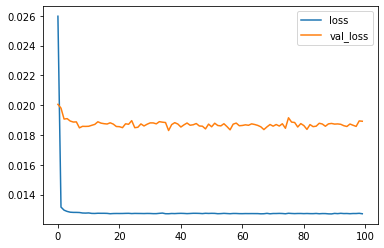

In [310]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [312]:
from sklearn.metrics import mean_squared_error
y_predictions=model.predict(data_df_valid_X)
np.sqrt(mean_squared_error(y_predictions,data_df_valid_Y))

0.13756866126085315